# Case of study

- you were hired to figure out which the main drivers of customers that sign up to a savings account in a bank
- Description:
  - customer churn
    - Calling a customer who cannot sign up can lead for he/seh to unsubcribe
  - Opportunity cost:
    - Sending to wrong product for the customer to sign up can create a loos in the case customer would be interesting to sign up for another
  - Relevance
    - Sending constinuously information that the customer is not interested can potentially lead for lower open rate willingness in the future


- Step by Step
  1. Prepare Dataset
  2. Splot into training and test set
  3. Perform random forest
  4. Predict using the Random Forest
  5. Model Assesment
  6. Execute Driver Importance


# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Load data

In [3]:
data = pd.read_csv("./data/bank-full.csv", sep = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Prep

transform the string variables

In [4]:
dataset = pd.get_dummies(data = data,
                         drop_first = True)
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


isolate X and Y

In [5]:
y = dataset.iloc[:,-1]
X = dataset.iloc[:, :-1]
X.head(1)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


split into training and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6276,31,66,27,121,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2876,48,427,14,201,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39212,33,139,18,732,2,291,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
40781,23,0,10,213,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7551,37,1255,30,224,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# RF model

In [7]:
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

## Predictions

In [8]:
predictions = model.predict(X_test)
predictions[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

checkin dataset balance

In [9]:
y_test.mean()

0.11699657193409267

# Confusion Matrix

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.90      9043



- Acc: used when we have balanced dataset
- Precision: used when we are skewed towards True values
- F-Score: used for unbalanced dateset

# Feature Importance

<AxesSubplot:>

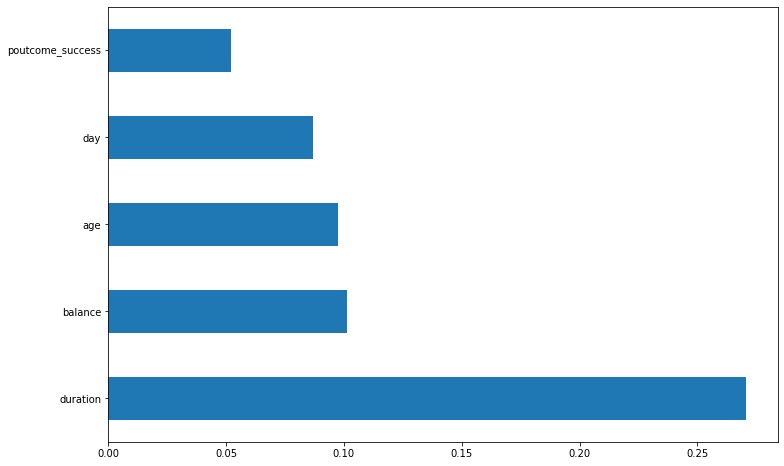

In [11]:
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (12, 8))